In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

In [3]:
EXCEL = pd.read_excel('excel_convert.xlsx',sheet_name='Sheet2 (2)')

In [4]:
dummy = EXCEL.copy()

In [5]:
dummy

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,SPACE.2,Merged_Water,Merged_Tree,Merged_Grass,Merged_Flooded_vegetation,Merged_Crops,Merged_Shrub_and_Scrub,Merged_Built,Merged_Bare,Merged_Snow_and_Ice
0,38.0,30.0,0.0,12.8,8.0,100.0,0.0,0.0,0.0,0.0,...,NaN,0.055115,0.570959,0.120244,0.0,0.127490,0.109102,0.214445,0.219225,0.000000
1,23.0,15.0,0.0,4.3,5.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.019574,0.744210,0.031540,0.0,0.075616,0.038125,0.178811,0.001240,0.000000
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.176258,0.180864,0.001183,0.0,0.040846,0.012055,0.660236,0.000000,0.000000
3,12476.0,12425.0,12479.0,10743.0,12476.0,5073.0,4801.0,7808.0,6636.0,12544.0,...,NaN,0.056828,0.517990,0.046127,0.0,0.027793,0.036468,0.383211,0.000000,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.056828,0.517990,0.046127,0.0,0.027793,0.036468,0.383211,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,0.946069,0.004140,0.0,0.010465,0.014617,0.055564,0.006512,0.000000
31453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,0.077490,0.000000,0.0,0.007764,0.000000,0.932797,0.000000,0.000000
31454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.090294,0.480567,0.018727,0.0,0.039046,0.063140,0.470982,0.021395,0.000000
31455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.011005,0.684350,0.031737,0.0,0.055249,0.032851,0.227439,0.003101,0.014815


In [6]:
X = dummy[['tempC','sunHour','pressure','DewPointC','FeelsLikeC',
           'HeatIndexC','WindChillC','WindGustKmph','cloudcover','humidity','precipMM',
           'winddirDegree','windspeedKmph','FirstStepDuration',
           'LastStepDuration','OpDeviceType','maxtempC','mintempC','moon_illumination','Province',
           'Water_pixels','Tree_pixels','Grass_pixels','Flooded_vegetation_pixels','Crops_pixels',
           'Shrub_and_Scrub_pixels','Built_pixels','Bare_pixels','Snow_and_Ice_pixels']]

In [7]:
X

,tempC,sunHour,pressure,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,...,Province,Water_pixels,Tree_pixels,Grass_pixels,Flooded_vegetation_pixels,Crops_pixels,Shrub_and_Scrub_pixels,Built_pixels,Bare_pixels,Snow_and_Ice_pixels
0,0.421053,0.188235,0.750000,0.666667,0.44,0.416667,0.421053,0.402597,0.67,0.701493,...,1.0,0.041981,0.571097,0.031342,0.0,0.096183,0.109102,0.213967,0.166822,0.0
1,0.315789,0.188235,0.750000,0.583333,0.32,0.291667,0.315789,0.337662,0.60,0.776119,...,1.0,0.015080,0.726755,0.006111,0.0,0.086066,0.038125,0.178811,0.001240,0.0
2,0.473684,0.188235,0.666667,0.666667,0.44,0.416667,0.473684,0.402597,0.92,0.641791,...,1.0,0.179186,0.139788,0.000000,0.0,0.046363,0.001206,0.660236,0.000000,0.0
3,0.421053,0.858824,0.750000,0.583333,0.40,0.375000,0.421053,0.233766,0.25,0.626866,...,0.6,0.058643,0.518115,0.044155,0.0,0.031634,0.011754,0.372927,0.000000,0.0
4,0.421053,0.858824,0.750000,0.583333,0.40,0.375000,0.421053,0.233766,0.25,0.626866,...,0.6,0.058643,0.518115,0.044155,0.0,0.031634,0.011754,0.372927,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31452,0.315789,0.352941,0.750000,0.666667,0.32,0.291667,0.315789,0.181818,0.53,0.865672,...,0.0,0.000000,0.925377,0.000000,0.0,0.011911,0.014617,0.055564,0.000000,0.0
31453,0.526316,0.529412,0.583333,0.666667,0.48,0.458333,0.526316,0.181818,0.75,0.597015,...,0.4,0.000000,0.045127,0.000000,0.0,0.007300,0.000000,0.932797,0.000000,0.0
31454,0.473684,0.529412,0.583333,0.666667,0.48,0.458333,0.473684,0.259740,0.52,0.656716,...,0.4,0.092060,0.371994,0.002957,0.0,0.044442,0.063140,0.470982,0.000620,0.0
31455,0.315789,0.352941,0.833333,0.583333,0.32,0.291667,0.315789,0.181818,0.60,0.776119,...,0.4,0.004468,0.684514,0.031737,0.0,0.062884,0.032851,0.227439,0.003101,0.0


In [8]:
Y = dummy['CauseType']

In [9]:
Y

0         0
1         0
2         0
3         0
4         0
         ..
31452     0
31453    12
31454    12
31455    12
31456    12
Name: CauseType, Length: 31457, dtype: int64

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [11]:
nn_classifier = MLPClassifier(hidden_layer_sizes=(8, 16), max_iter=1000, random_state=42)

In [12]:
nn_classifier.fit(X_train,Y_train)

MLPClassifier(hidden_layer_sizes=(8, 16), max_iter=1000, random_state=42)

In [13]:
Y_pred = nn_classifier.predict(X_test)

nn_score = 0.560553083280356


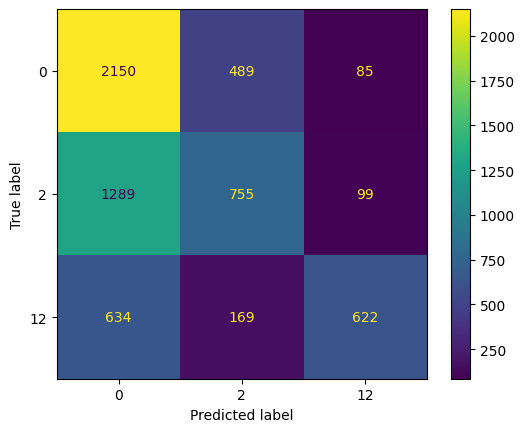

              precision    recall  f1-score   support

           0       0.53      0.79      0.63      2724
           2       0.53      0.35      0.42      2143
          12       0.77      0.44      0.56      1425

    accuracy                           0.56      6292
   macro avg       0.61      0.53      0.54      6292
weighted avg       0.59      0.56      0.54      6292



In [14]:
#Score
nn_score = nn_classifier.score(X_test,Y_test)
print("nn_score =",nn_score)
#Confusion_matrix
cm = confusion_matrix(Y_test, Y_pred, labels=nn_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=nn_classifier.classes_)
disp.plot()
plt.show()

#Classification_report
print(classification_report(Y_test,Y_pred))

In [15]:
dt_classifier = DecisionTreeClassifier(random_state=42)

In [16]:
dt_classifier.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=42)

In [17]:
Y_pred1 = dt_classifier.predict(X_test)

<Axes: >

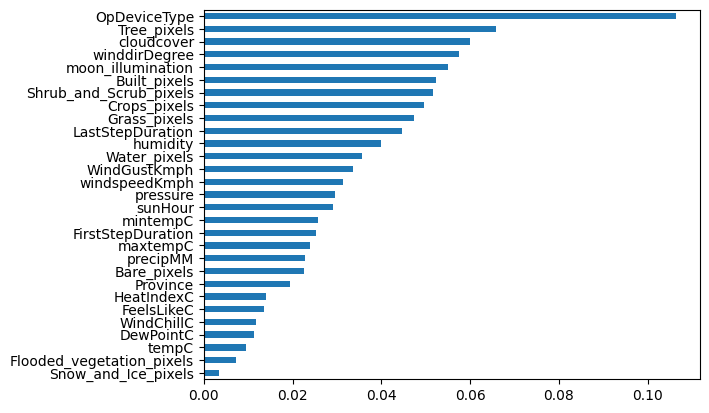

In [18]:
fs1=pd.Series(dt_classifier.feature_importances_, index=X.columns).sort_values(ascending=True)
fs1.plot.barh()

dt_score = 0.5950413223140496


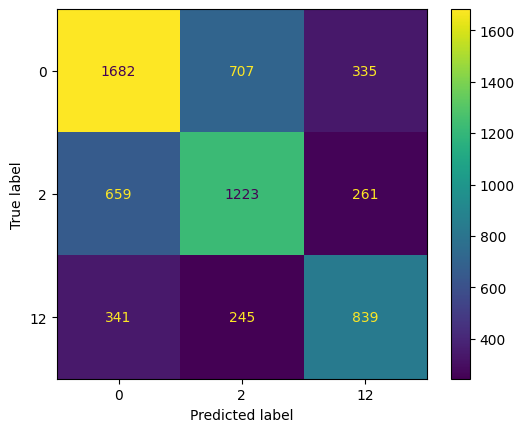

              precision    recall  f1-score   support

           0       0.63      0.62      0.62      2724
           2       0.56      0.57      0.57      2143
          12       0.58      0.59      0.59      1425

    accuracy                           0.60      6292
   macro avg       0.59      0.59      0.59      6292
weighted avg       0.60      0.60      0.60      6292



In [19]:
#Score
dt_score = dt_classifier.score(X_test,Y_test)
print("dt_score =",dt_score)
#Confusion_matrix
cm = confusion_matrix(Y_test, Y_pred1, labels=dt_classifier.classes_)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dt_classifier.classes_)
disp1.plot()
plt.show()

#Classification_report
print(classification_report(Y_test,Y_pred1))


In [20]:
rf_classifier = RandomForestClassifier(random_state=42)

In [47]:
rf_classifier.fit(X_train,Y_train)

RandomForestClassifier(random_state=42)

In [48]:
Y_pred2 = rf_classifier.predict(X_test)

<Axes: >

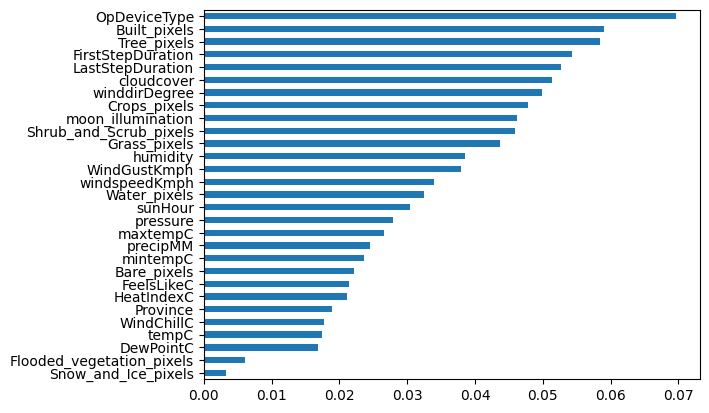

In [49]:
fs2=pd.Series(rf_classifier.feature_importances_, index=X.columns).sort_values(ascending=True)
fs2.plot.barh()

rf_score = 0.6981881754609027


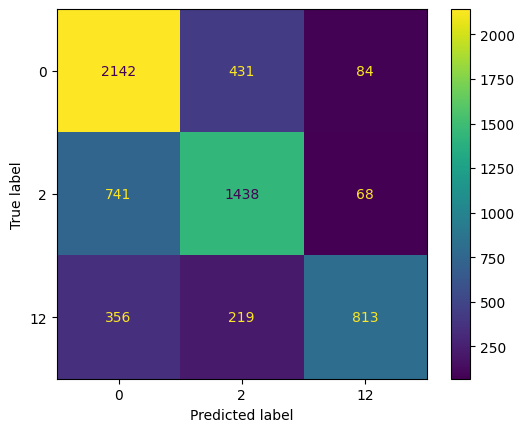

              precision    recall  f1-score   support

           0       0.66      0.81      0.73      2657
           2       0.69      0.64      0.66      2247
          12       0.84      0.59      0.69      1388

    accuracy                           0.70      6292
   macro avg       0.73      0.68      0.69      6292
weighted avg       0.71      0.70      0.70      6292



In [50]:
#Score
rf_score = rf_classifier.score(X_test,Y_test)
print("rf_score =",rf_score)
#Confusion_matrix
cm = confusion_matrix(Y_test, Y_pred2, labels=rf_classifier.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf_classifier.classes_)
disp2.plot()
plt.show()

#Classification_report
print(classification_report(Y_test,Y_pred2))


In [51]:
import pickle
filename = "rf_model_new.pickle"
pickle.dump(rf_classifier, open(filename, "wb"))

In [26]:
# feature_names = X.columns

In [27]:
# importances = rf_classifier.feature_importances_
# std = np.std([tree.feature_importances_ for tree in rf_classifier.estimators_], axis=0)


In [28]:


# forest_importances = pd.Series(importances, index=feature_names)

# fig, ax = plt.subplots()
# forest_importances.plot.bar(yerr=std, ax=ax)
# ax.set_title("Feature importances using MDI")
# ax.set_ylabel("Mean decrease in impurity")
# fig.tight_layout()

In [29]:
# result = permutation_importance(
#     rf_classifier, X_test, Y_test, n_repeats=10, random_state=42, n_jobs=2
# )

# forest_importances = pd.Series(result.importances_mean, index=feature_names)

In [30]:
# fig, ax = plt.subplots()
# forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
# ax.set_title("Feature importances using permutation on full model")
# ax.set_ylabel("Mean accuracy decrease")
# fig.tight_layout()
# plt.show()